## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud,STOPWORDS
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('scrapped_TIX ID_EN.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7286be06-c65c-44ad-b76a-05575bef0d01,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga bisa bayar coyyyy ,gmn ni",3,0,3.12.0,2024-12-12 04:25:11,"Hi TIX Hunter, terima kasih atas review Anda d...",2024-12-12 04:27:29,3.12.0
1,c4e3fbde-e8df-4f4c-a671-0d86ee3d6ebc,Peter Hariyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Tidak support lokasi bioskop selain daripada j...,1,0,NaN,2024-12-10 12:27:40,"Hi TIX Hunter, mohon maaf, fitur lokasi biosko...",2024-12-10 12:43:21,NaN
2,6d7635ff-8a4e-4c0b-87d3-a36d10061b1d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great apps!,5,0,3.12.0,2024-12-10 12:11:54,"Hi TIX Hunter, thank you for your review. Hope...",2024-12-10 12:43:48,3.12.0
3,9c7f8c01-c68b-4670-907a-cff94a5cc9bb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,0,3.7.0,2024-12-07 00:38:14,"Hi TIX Hunter, kami mohon maaf atas ketidaknya...",2024-12-07 02:27:10,3.7.0
4,1d51b7b8-4b5e-4bdf-aa70-5cf585445beb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu dan bekerja dengan baik.. keja...,5,0,3.12.0,2024-12-02 05:40:26,"Hi TIX Hunter, terima kasih atas review yang d...",2024-12-02 05:55:19,3.12.0
...,...,...,...,...,...,...,...,...,...,...,...
28242,9ad91e2b-6f0c-4204-a667-677f819c49bd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Deposit saldonya ternyata juga bisa buat beli ...,5,0,0.2.0,2018-03-29 19:40:13,NaN,NaN,0.2.0
28243,e3ebea46-5037-4f36-9600-dab44a1a4d40,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Order tickets no antre pay with DANA. Love it,5,1,0.2.0,2018-03-29 18:45:01,NaN,NaN,0.2.0
28244,3c3e99f1-7be4-4623-b00e-726429c0bf79,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat membantu, jadi g perlu ngantri tiket la...",5,1,NaN,2018-03-29 14:27:50,NaN,NaN,NaN
28245,9389e887-fac7-41f5-977f-5a81ad5fc7ae,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,cara cepat untuk book. buruan buat yg ios min,5,1,0.2.0,2018-03-29 13:30:46,NaN,NaN,0.2.0


## 1. Cleaning Data

In [3]:
df = df[['content','score']]
df

,content,score
0,"Ga bisa bayar coyyyy ,gmn ni",3
1,Tidak support lokasi bioskop selain daripada j...,1
2,Great apps!,5
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1
4,sangat membantu dan bekerja dengan baik.. keja...,5
...,...,...
28242,Deposit saldonya ternyata juga bisa buat beli ...,5
28243,Order tickets no antre pay with DANA. Love it,5
28244,"Sangat membantu, jadi g perlu ngantri tiket la...",5
28245,cara cepat untuk book. buruan buat yg ios min,5


In [4]:
df.shape

(28247, 2)

In [5]:
df = df.drop_duplicates(subset='content')

In [6]:
df = df.dropna()

In [7]:
df.shape

(18085, 2)

In [8]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['content'] = df['content'].apply(clean_text)

In [9]:
df['content'] = df['content'].str.lower()
df.head()

,content,score
0,ga bisa bayar coyyyy gmn ni,3
1,tidak support lokasi bioskop selain daripada j...,1
2,great apps,5
3,gak bsa byar pke shopeepay pas klik gk bsa red...,1
4,sangat membantu dan bekerja dengan baik kejar ...,5


## 2. Preprocessing

In [10]:
score = df['score']

In [11]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [12]:
# Normalisasi
norm = {
      'gk ':' tidak ',
      'gak ':' tidak ',
      'ga ':' tidak ',
      'nggak ':' tidak ',
      'tdk ':' tidak ',
      'jg ':' juga ',
      'jga ':' juga ',
      'jd ':' jadi ',
      'sgt ':' sangat ',
      'bgt ':' banget ',
      'bgd ':' banget ',
      'bangettt ':' banget ',
      'aplikasiny ':' aplikasi ',
      'aplikasinya ':' aplikasi ',
      'tix ':' tix id ',
      'tiket ':' tiket ',
      'bioskop ':' bioskop ',
      'film ':' film ',
      'nonton ':' nonton ',
      'beli ':' beli ',
      'pesan ':' pesan ',
      'mudah ':' mudah ',
      'gampang ':' mudah ',
      'susah ':' sulit ',
      'ribet ':' sulit ',
      'bagus ':' bagus ',
      'keren ':' bagus ',
      'mantap ':' bagus ',
      'oke ':' bagus ',
      'jelek ':' buruk ',
      'payah ':' buruk ',
      'mengecewakan ':' buruk ',
      'buruk sekali ':' buruk ',
      'mahal ':' mahal ',
      'murah ':' murah ',
      'promo ':' promo ',
      'diskon ':' diskon ',
      'cs ':' customer service ',
      'pelayanan ':' pelayanan ',
      'bsa ' : ' bisa ',
      'byar ' : ' bayar ',
  }

def normalisasi(text):
  for i in norm:
    text = text.replace(i, norm[i])
  return text

df['content'] = df['content'].apply(lambda x: normalisasi(x))


In [13]:
df = df.sample(n=1000, random_state=42)  # Ambil 6000 data
df.score.value_counts()

,count
score,
5,608
1,214
4,80
3,50
2,48


In [14]:
df

,content,score
9949,the way easier to book tickets,5
1804,sampah musnah aja dari playstore mending gausa...,1
28072,awalnya ok tapi setelah top up mau beli tike...,2
6689,the page keeps reloading and it says that no s...,1
6519,woii kalo tidak mau sulit gini gausah ada wo...,1
...,...,...
9501,kenapa ya kok jadwal yg terbuka hanya utk hari...,3
22356,good app thanks,5
4404,good application to book a cinema ticket,5
22021,alhamdulillah nonton berdua di kokas cuma 20rb,5


In [15]:
!pip install Sastrawi

In [16]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover = StopWordRemover(new_array)

def stopword(text):
  text = stop_words_remover.remove(text)
  return text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [17]:
# Tokenize
tokenized = df['content'].apply(lambda x: x.split())
tokenized

,content
9949,"[the, way, easier, to, book, tickets]"
1804,"[sampah, musnah, aja, playstore, mending, gaus..."
28072,"[awalnya, tapi, top, up, mau, beli, tiket, pre..."
6689,"[the, page, keeps, reloading, and, it, says, t..."
6519,"[woii, kalo, mau, sulit, gini, gausah, woiii, ..."
...,...
9501,"[ya, kok, jadwal, yg, terbuka, utk, hari, aja,..."
22356,"[good, app, thanks]"
4404,"[good, application, to, book, a, cinema, ticket]"
22021,"[alhamdulillah, nonton, berdua, kokas, cuma, 2..."


In [18]:
# Steaming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory



def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = ' '.join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

the way easier to book tickets
sampah musnah aja playstore mending gausah buat aplikasi
awal tapi top up mau beli tiket pre sale lot banget dah tinggal konfirmasi aja muter loading sampe 1 jam kelar2 refresh malah lebih lot tolong tingkatin lg layan
the page keeps reloading and it says that no seats available please fix this i think your server is overload
woii kalo mau sulit gin gausah woiii promooo tadi pas beli udh sukses tiba2 refound eh skrng berkurng saldo tiba2 tonton ng tbtb jadi has jam nya udh lewat jugal kan tolol tlpn custom service malah full usah ngadain promo woiii kalo server abalabal
immediately uninstalled slow and much of the information is not updated
very easy to use and more promotion can be found previewtrailer of movies are available too
experience the same after upgrading to android 12 but tix id id only respond by saying please email to blablabla why not fix and give us update immediately why making it so hard to use
update mulu rempessss
bagus deh booking fil

,content
0,the way easier to book tickets
1,sampah musnah aja playstore mending gausah bua...
2,awal tapi top up mau beli tiket pre sale lot b...
3,the page keeps reloading and it says that no s...
4,woii kalo mau sulit gin gausah woiii promooo t...


In [19]:
score = df['score']
score

,score
9949,5
1804,1
28072,2
6689,1
6519,1
...,...
9501,3
22356,5
4404,5
22021,5


In [20]:
# Menggabungkan kedua DataFrame berdasarkan teks
score.drop(columns="Unnamed: 0", inplace=True)
df = pd.concat([tokenized, score], axis=1)
df

,content,score
9949,the way easier to book tickets,5
1804,sampah musnah aja playstore mending gausah bua...,1
28072,awal tapi top up mau beli tiket pre sale lot b...,2
6689,the page keeps reloading and it says that no s...,1
6519,woii kalo mau sulit gin gausah woiii promooo t...,1
...,...,...
9501,ya kok jadwal yg buka utk hari aja bs klik utk...,3
22356,good app thanks,5
4404,good application to book a cema ticket,5
22021,alhamdulillah nonton dua kokas cuma 20rb,5


## 3. Labeling

In [21]:
def label_sentiment(score):
  if score <= 2:
    return 'negatif'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [22]:
df.head()

,content,score,sentimen
9949,the way easier to book tickets,5,positif
1804,sampah musnah aja playstore mending gausah bua...,1,negatif
28072,awal tapi top up mau beli tiket pre sale lot b...,2,negatif
6689,the page keeps reloading and it says that no s...,1,negatif
6519,woii kalo mau sulit gin gausah woiii promooo t...,1,negatif


In [23]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

,count
sentimen,
positif,738
negatif,262


## 4. Visualization

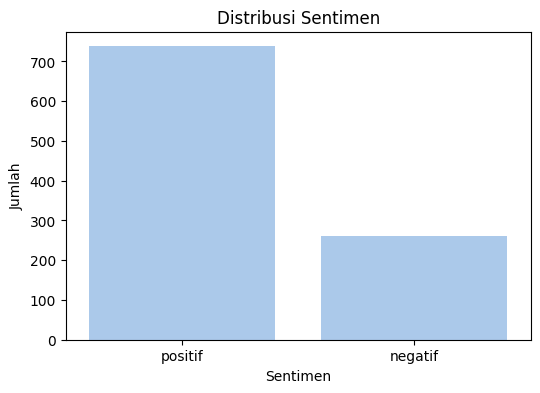

In [24]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentimen')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [25]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

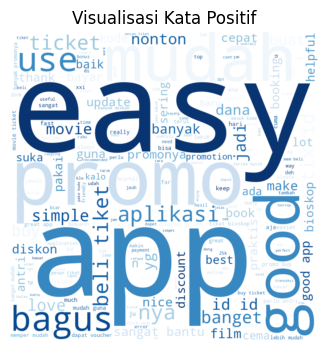

In [26]:
all_text_s1 = ' '.join(word for word in data_positif['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.show()


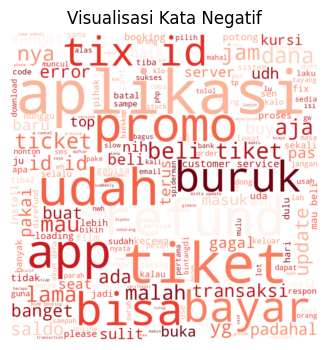

In [27]:
all_text_s0 = ' '.join(word for word in data_negatif['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s0)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.show()


## 5. Spliting Data

In [28]:
X = df.content
y = df.sentimen

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Training Data (SVM, Naive Bayes, RandomForest)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [31]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel='linear')
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [32]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer', tvec), ('classifier', clf1)])
model2 = Pipeline([('vectorizer', tvec), ('classifier', clf2)])
model3 = Pipeline([('vectorizer', tvec), ('classifier', clf3)])

In [33]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [34]:
hasil1=model1.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [35]:
matrix = classification_report(y_test, hasil1)
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.81      0.64      0.72        45
     positif       0.90      0.95      0.93       155

    accuracy                           0.89       200
   macro avg       0.85      0.80      0.82       200
weighted avg       0.88      0.89      0.88       200



In [36]:
matrix = classification_report(y_test, hasil2)
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.88      0.33      0.48        45
     positif       0.84      0.99      0.91       155

    accuracy                           0.84       200
   macro avg       0.86      0.66      0.69       200
weighted avg       0.85      0.84      0.81       200



In [37]:
matrix = classification_report(y_test, hasil3)
print('Classification report : \n', matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.77      0.51      0.61        45
     positif       0.87      0.95      0.91       155

    accuracy                           0.85       200
   macro avg       0.82      0.73      0.76       200
weighted avg       0.85      0.85      0.84       200



In [38]:
hasilSuperVectorMachine = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForest = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [53]:
model = {'Model' : ['Super Vector Machine',
                    'Multinomial Naive Bayes',
                    'Random Forest Classifier',
                    ],
         'AccuracyScore' : [hasilSuperVectorMachine,
                            hasilMultinomialNB,
                            hasilRandomForest,],
         'Precision' : [precision1, precision2, precision3],
         'Recall' : [recall1,recall2,recall3],
         'F1-Score' : [f1_1,f1_2,f1_3]}

model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Super Vector Machine,0.885,0.880640,0.885,0.880233
1,Multinomial Naive Bayes,0.840,0.846480,0.840,0.810498
2,Random Forest Classifier,0.855,0.847206,0.855,0.843846


In [59]:
def classify_text(input_text):
  models = [
      ('SuperVectorMachine', model_supervectormachine),
      ('MultinomialNaiveBayes', model_multinomialnaivebayes),
      ('RandomForestClassifier', model_randomforestclassifier)
  ]

  results = {}
  for name, model in models:
    prediction = model.predict([input_text])
    results[name] = prediction[0]

  return results


In [60]:
model_supervectormachine = model1.fit(X_train, y_train)
model_multinomialnaivebayes = model2.fit(X_train, y_train)
model_randomforestclassifier = model3.fit(X_train, y_train)

In [61]:
input_text = input("Masukkan teks yang ingin diprediksi sentimennya: ")

results = classify_text(input_text)

print("Input kata:", input_text)
print("\nHasil Klasifikasi:")
for model, prediction in results.items():
  print(f"{model}: {prediction}")

Masukkan teks yang ingin diprediksi sentimennya: sampah
Input kata: sampah

Hasil Klasifikasi:
SuperVectorMachine: negatif
MultinomialNaiveBayes: negatif
RandomForestClassifier: positif
